In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")
                # index_col = 'Year',
                # parse_dates=False)
df

,ItemID,Year,Quantity,VehID
0,515003,2006,184840,2006FordRanger-515003-2006
1,515036,2006,78034,2006CadillacEscalade-515036-2006
2,515036,2006,14038,2006CadillacEscalade EXT-515036-2006
3,515036,2006,915939,2006ChevroletSilverado 1500-515036-2006
4,515036,2006,322982,2006ChevroletTahoe-515036-2006
...,...,...,...,...
10684,HUB600,2023,211330,2023FordBronco-HUB600-2023
10685,513452,2023,373538,2023FordExplorer-513452-2023
10686,513452,2023,31102,2023LincolnAviator-513452-2023
10687,512513,2023,49220,2023JeepCherokee-512513-2023


In [27]:
itemID = ['512360'] #input the item id you want to search
mask = df['ItemID'].isin(itemID)
filtered_item = df[mask]
filtered_item


,ItemID,Year,Quantity,VehID
1915,512360,2008,247498,2008DodgeGrand Caravan-512360-2008
2789,512360,2009,181332,2009DodgeGrand Caravan-512360-2009
2790,512360,2009,29362,2009VolkswagenRoutan-512360-2009
3609,512360,2010,221924,2010DodgeGrand Caravan-512360-2010
3610,512360,2010,24946,2010VolkswagenRoutan-512360-2010
4338,512360,2011,206626,2011DodgeGrand Caravan-512360-2011
4339,512360,2011,31922,2011VolkswagenRoutan-512360-2011


In [28]:
# creating a dictionary for all year manufacture
yearly_total = {}
for index, row in filtered_item.iterrows(): # nice method to use
    year = row['Year']
    quantity = row['Quantity']
    if year not in yearly_total:
        yearly_total[year] = quantity
    else:
        yearly_total[year] += quantity
print(yearly_total)
years = list(yearly_total.keys())
print(years)

{2008: 247498, 2009: 210694, 2010: 246870, 2011: 238548}
[2008, 2009, 2010, 2011]


In [29]:
# creating the prediction of all total demand in the after-market (2010 -> 2027)
scrappage_rate = 0.05
after_market = {}
for current_year in range(years[0]+3,years[len(years)-1]+14,1):
    # check year that are in the after-market
    start_year = current_year -13
    end_year = current_year -3
    if(start_year < years[0]):
        start_year = years[0]
    year_included = years[start_year -years[0]:end_year-years[0]+1]
    print(current_year,": ", year_included)
    #### calculate total up to current year###
    total = 0
    for year in year_included:
        total += yearly_total[year] *0.95**(current_year-(year+3)+1) ## 0.95 should be multiply extra n times for extra n years after 2010, 2010 is 1 time
        print(year, ": " + str(current_year-(year+3)+1) + "times")
    after_market[current_year] = int(total)
    print("**")
    #print(current_year, total)
        
after_market

2011 :  [2008]
2008 : 1times
**
2012 :  [2008, 2009]
2008 : 2times
2009 : 1times
**
2013 :  [2008, 2009, 2010]
2008 : 3times
2009 : 2times
2010 : 1times
**
2014 :  [2008, 2009, 2010, 2011]
2008 : 4times
2009 : 3times
2010 : 2times
2011 : 1times
**
2015 :  [2008, 2009, 2010, 2011]
2008 : 5times
2009 : 4times
2010 : 3times
2011 : 2times
**
2016 :  [2008, 2009, 2010, 2011]
2008 : 6times
2009 : 5times
2010 : 4times
2011 : 3times
**
2017 :  [2008, 2009, 2010, 2011]
2008 : 7times
2009 : 6times
2010 : 5times
2011 : 4times
**
2018 :  [2008, 2009, 2010, 2011]
2008 : 8times
2009 : 7times
2010 : 6times
2011 : 5times
**
2019 :  [2008, 2009, 2010, 2011]
2008 : 9times
2009 : 8times
2010 : 7times
2011 : 6times
**
2020 :  [2008, 2009, 2010, 2011]
2008 : 10times
2009 : 9times
2010 : 8times
2011 : 7times
**
2021 :  [2008, 2009, 2010, 2011]
2008 : 11times
2009 : 10times
2010 : 9times
2011 : 8times
**
2022 :  [2009, 2010, 2011]
2009 : 11times
2010 : 10times
2011 : 9times
**
2023 :  [2010, 2011]
2010 : 11t

{2011: 235123,
 2012: 423526,
 2013: 636876,
 2014: 831653,
 2015: 790070,
 2016: 750567,
 2017: 713038,
 2018: 677386,
 2019: 643517,
 2020: 611341,
 2021: 580774,
 2022: 417997,
 2023: 283247,
 2024: 135686}

In [30]:
# turn the dictionary into a df
result = pd.DataFrame(after_market.items(), columns=['Year', 'Qty'])
result

,Year,Qty
0,2011,235123
1,2012,423526
2,2013,636876
3,2014,831653
4,2015,790070
5,2016,750567
6,2017,713038
7,2018,677386
8,2019,643517
9,2020,611341


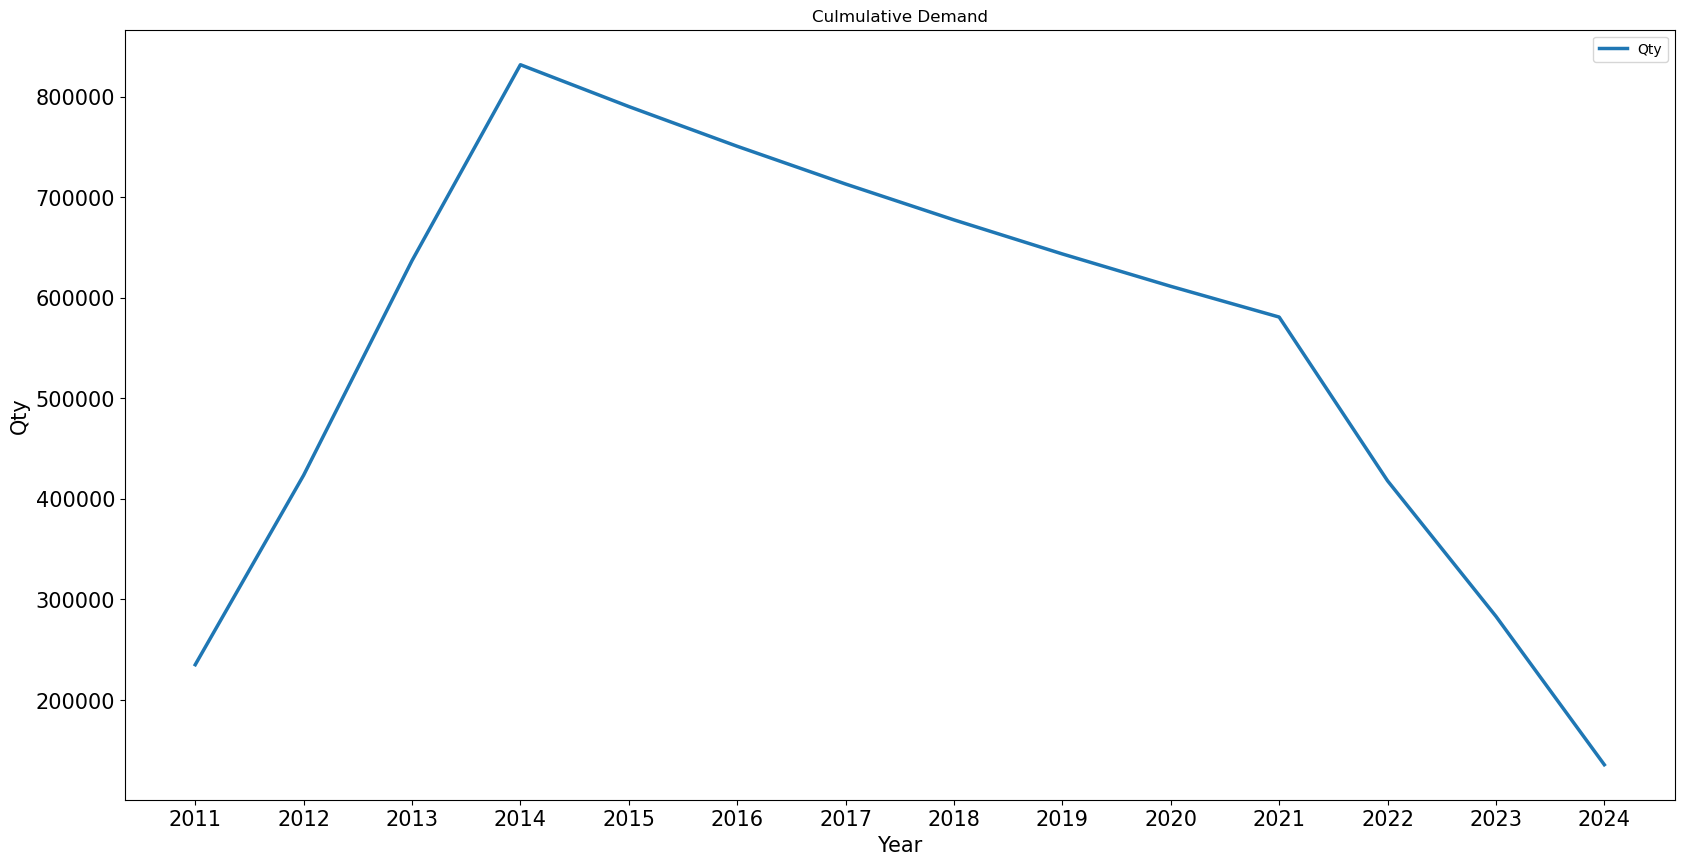

In [31]:
# plot the data
#result.plot(x="Year", y="Qty", kind="line") 
result['Qty'].plot(legend = True, label = 'Qty', title = \
      "Culmulative Demand", style = '-', linewidth = 2.5, fontsize=15,figsize=(20, 10))
# naming the x and y axis
plt.xlabel('Year', fontsize=15)
plt.ylabel('Qty', fontsize=15)
plt.xticks(result.index,result["Year"].values)
# plotting a line plot after changing it's width and height

plt.show()